In [1]:
import pandas as pd
from pathlib import Path

from classifier.training.utils import set_seed
from notebooks.notebook_utils import plot_label_dist

set_seed(42)

SRC_DATASET_ROOT = Path('./fn-content-dataset')
SRC_DATASET_NAME = 'images__participants.parquet'

In [2]:
df = pd.read_parquet(SRC_DATASET_NAME)
df

,file_name,1f,1f1m,2f,3f,1f2m,2f1m,1m,2m,3m
0,0.jpg,0,0,0,0,0,1,0,0,0
1,1.jpg,0,0,0,0,0,1,0,0,0
2,2.jpg,0,0,0,0,0,1,0,0,0
3,3.jpg,0,0,0,0,0,0,0,0,0
4,4.jpg,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
625134,625141.jpg,0,0,1,0,0,0,0,0,0
625135,625142.jpg,1,0,0,0,0,0,0,0,0
625136,625143.jpg,1,0,0,0,0,0,0,0,0
625137,625144.jpg,0,0,1,0,0,0,0,0,0


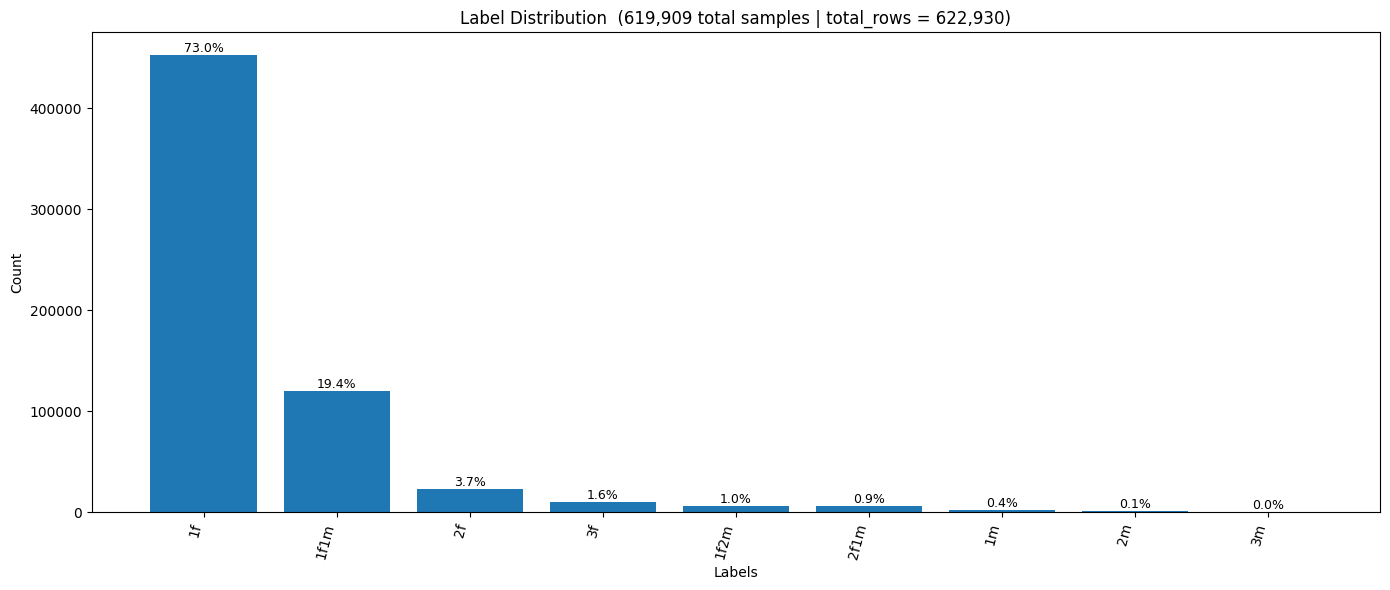

In [3]:
filtered_counts = plot_label_dist(df.drop(['file_name'], axis=1))

In [4]:
df['female'] = 0
df['females'] = 0
df['male'] = 0
df

,file_name,1f,1f1m,2f,3f,1f2m,2f1m,1m,2m,3m,female,females,male
0,0.jpg,0,0,0,0,0,1,0,0,0,0,0,0
1,1.jpg,0,0,0,0,0,1,0,0,0,0,0,0
2,2.jpg,0,0,0,0,0,1,0,0,0,0,0,0
3,3.jpg,0,0,0,0,0,0,0,0,0,0,0,0
4,4.jpg,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625134,625141.jpg,0,0,1,0,0,0,0,0,0,0,0,0
625135,625142.jpg,1,0,0,0,0,0,0,0,0,0,0,0
625136,625143.jpg,1,0,0,0,0,0,0,0,0,0,0,0
625137,625144.jpg,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
join_dict = {
    'female': ['1f', '2f', '3f', '1f1m', '1f2m', '2f1m'],
    'females': ['2f', '3f', '2f1m'],
    'male': ['1f1m', '1f2m', '2f1m', '1m', '2m', '3m'],
}

for primary, splits in join_dict.items():
    for split in splits:
        df[primary] += df[split]

df['female'] /= df['female']
df['females'] /= df['females']
df['male'] /= df['male']

total_to_drop = []
for v in join_dict.values():
    total_to_drop.extend(v)

total_to_drop = list(set(total_to_drop))
df = df.drop(total_to_drop, axis=1, inplace=False)
df = df.reset_index(drop=True, inplace=False).fillna(0)
df

,file_name,female,females,male
0,0.jpg,1.0,1.0,1.0
1,1.jpg,1.0,1.0,1.0
2,2.jpg,1.0,1.0,1.0
3,3.jpg,0.0,0.0,0.0
4,4.jpg,0.0,0.0,0.0
...,...,...,...,...
622925,625141.jpg,1.0,1.0,0.0
622926,625142.jpg,1.0,0.0,0.0
622927,625143.jpg,1.0,0.0,0.0
622928,625144.jpg,1.0,1.0,0.0


In [6]:
labels = set(df.columns.tolist())
labels.discard('file_name')
labels = list(labels)

In [7]:
df[labels] = df[labels].astype(int)
df

,file_name,female,females,male
0,0.jpg,1,1,1
1,1.jpg,1,1,1
2,2.jpg,1,1,1
3,3.jpg,0,0,0
4,4.jpg,0,0,0
...,...,...,...,...
622925,625141.jpg,1,1,0
622926,625142.jpg,1,0,0
622927,625143.jpg,1,0,0
622928,625144.jpg,1,1,0


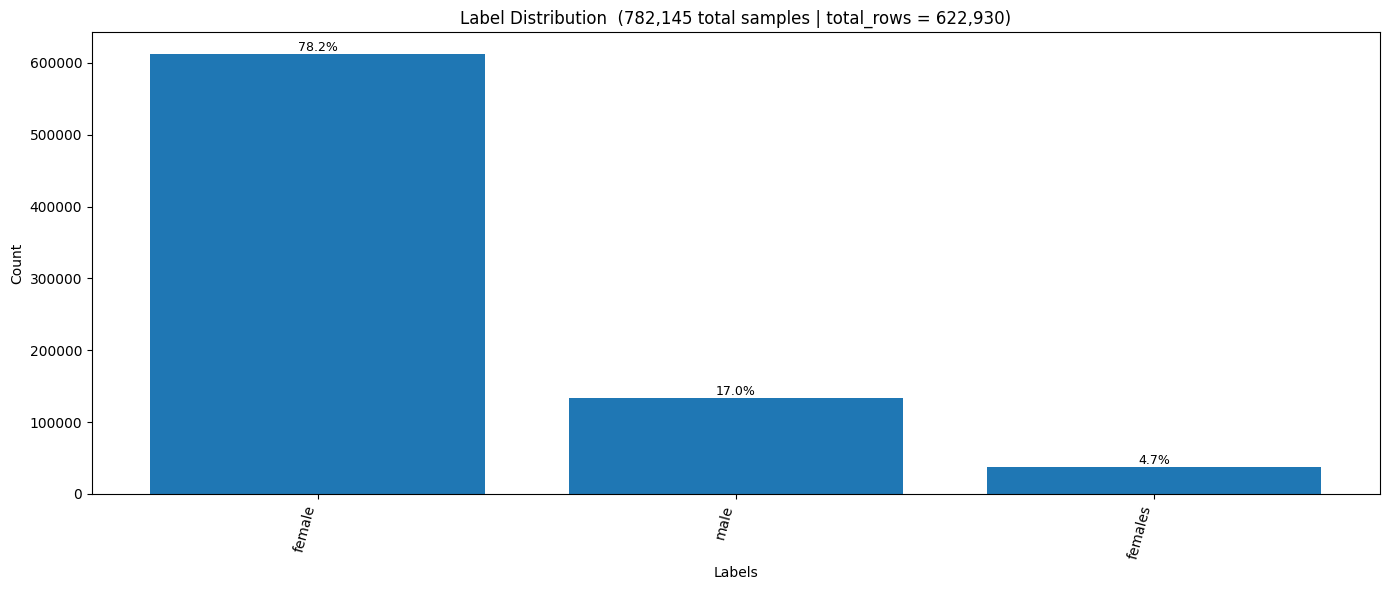

female     611896
male       133312
females     36937
dtype: int64

In [8]:
plot_label_dist(df)

In [9]:
def remove_empty_rows(dataframe: pd.DataFrame):
    if 'file_name' not in dataframe.columns:
        non_empty_rows = dataframe.sum(axis=1) != 0
    else:
        non_empty_rows = dataframe.drop(['file_name'], axis=1).sum(axis=1) != 0

    return dataframe.loc[non_empty_rows]

In [10]:
file_names = df[['file_name']]

female = (df['female'] == 1) & (df['male'] == 0) & (df['females'] == 0)
females = (df['females'] == 1) & (df['male'] == 0)
male = (df['male'] == 1) & (df['female'] == 0) & (df['females'] == 0)
both = (df['male'] == 1) & (df['female'] == 1)

female_df = df[['female']][female]
females_df = df[['females']][females]
male_df = df[['male']][male]
both_df = df[both]

In [11]:
female = remove_empty_rows(female_df)
females = remove_empty_rows(females_df)
male = remove_empty_rows(male_df)
both = remove_empty_rows(both_df)

female.shape, females.shape, male.shape, both.shape

((450515, 1), (30901, 1), (2832, 1), (130480, 4))

In [12]:
samp_fem = female.sample(n=2832)
samp_fems = females.sample(n=2832)
samp_mal = male.sample(n=2832)
samp_both = both.sample(n=2832)

In [21]:
t = pd.concat([samp_fem, samp_fems, samp_mal, samp_both], axis=0).fillna(0).drop('file_name', axis =1).astype(int)
t

,female,females,male
540600,1,0,0
574207,1,0,0
90074,1,0,0
3653,1,0,0
308469,1,0,0
...,...,...,...
475697,1,0,1
28010,1,0,1
149564,1,0,1
64695,1,0,1


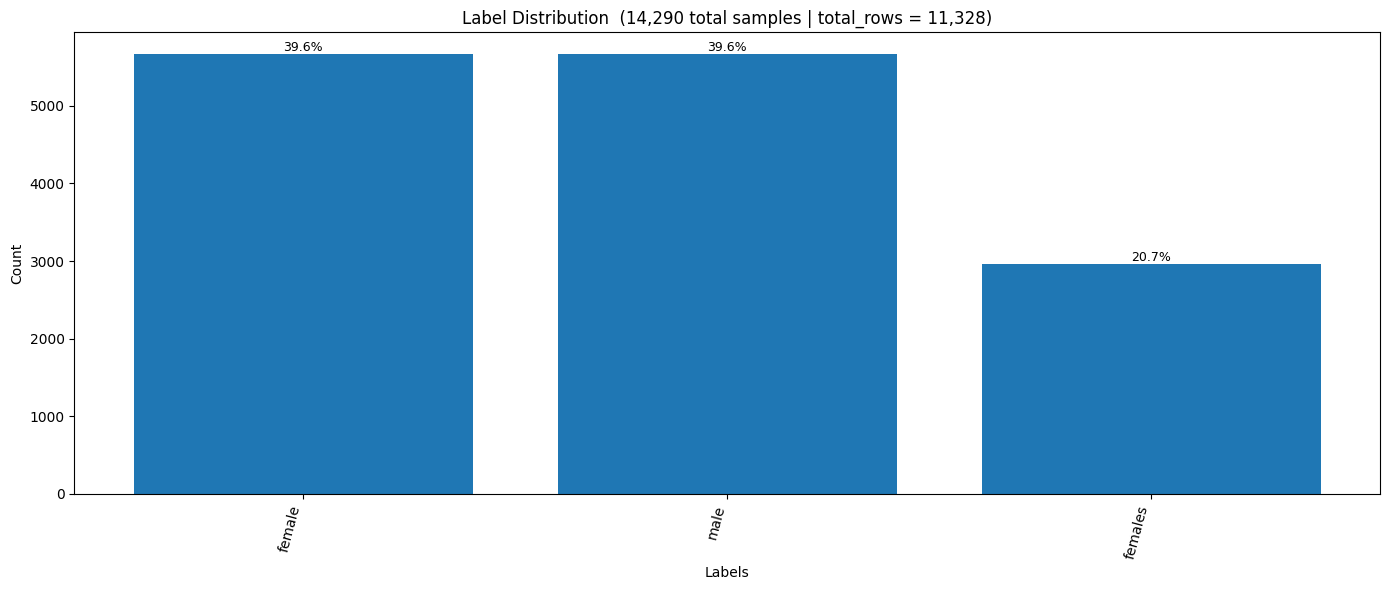

female     5664
male       5664
females    2962
dtype: int64

In [22]:
plot_label_dist(t)

In [23]:
file_names.merge(t, left_index=True, right_index=True)

,file_name,female,females,male
83,83.jpg,0,0,1
99,99.jpg,0,0,1
121,121.jpg,1,0,0
125,125.jpg,1,0,0
135,135.jpg,0,0,1
...,...,...,...,...
622636,624849.jpg,1,0,0
622740,624953.jpg,0,1,0
622745,624958.jpg,0,0,1
622772,624987.jpg,1,0,0
